In [418]:
# ============================
# 1) GaussianNB Using sklearn
# ============================

In [420]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [422]:
df = pd.read_csv('data.csv')
columns_to_drop = []
if 'id' in df.columns:
    columns_to_drop.append('id')
if 'Unnamed: 32' in df.columns:
    columns_to_drop.append('Unnamed: 32')
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [424]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42, stratify=y)

In [434]:
startTime = time.time()
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
endTime = time.time()
totalTime = endTime - startTime

In [436]:
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [438]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)
print(f"\nTotal time : {totalTime:.6f}")

Accuracy: 0.9417
Confusion Matrix:
[[75  0]
 [ 7 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        75
           1       1.00      0.84      0.92        45

    accuracy                           0.94       120
   macro avg       0.96      0.92      0.94       120
weighted avg       0.95      0.94      0.94       120


Total time : 0.002002


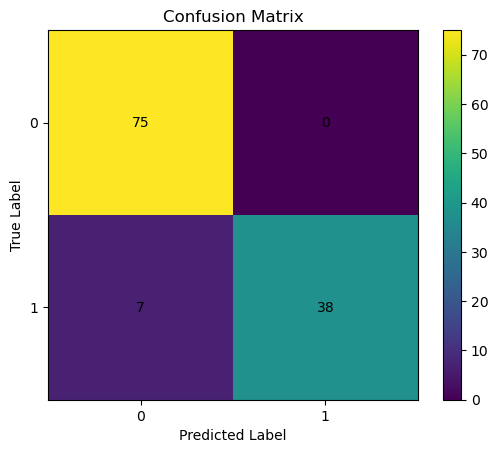

In [432]:
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

class_labels = [0, 1]
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center")
plt.show()